In [63]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 1. Tải và tiền xử lý dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Chuẩn hóa dữ liệu: chia cho 255 để đưa giá trị pixel về khoảng [0,1]
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Chuyển nhãn thành one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [64]:
# 2. Xây dựng mô hình CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [66]:
# In tóm tắt mô hình
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
# 3. Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                   validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8670 - loss: 0.4423 - val_accuracy: 0.9802 - val_loss: 0.0585
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9822 - loss: 0.0575 - val_accuracy: 0.9827 - val_loss: 0.0515
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9876 - loss: 0.0382 - val_accuracy: 0.9864 - val_loss: 0.0387
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9907 - loss: 0.0294 - val_accuracy: 0.9890 - val_loss: 0.0371
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9925 - loss: 0.0238 - val_accuracy: 0.9887 - val_loss: 0.0373
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9940 - loss: 0.0178 - val_accuracy: 0.9910 - val_loss: 0.0293
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9950 - loss: 0.0148 - val_accuracy: 0.9906 - val_loss: 0.0264
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9963 - loss: 0.0105 - val_accuracy

In [68]:
# 4. Đánh giá mô hình
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nĐộ chính xác trên tập kiểm tra: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9888 - loss: 0.0390

Độ chính xác trên tập kiểm tra: 0.9919


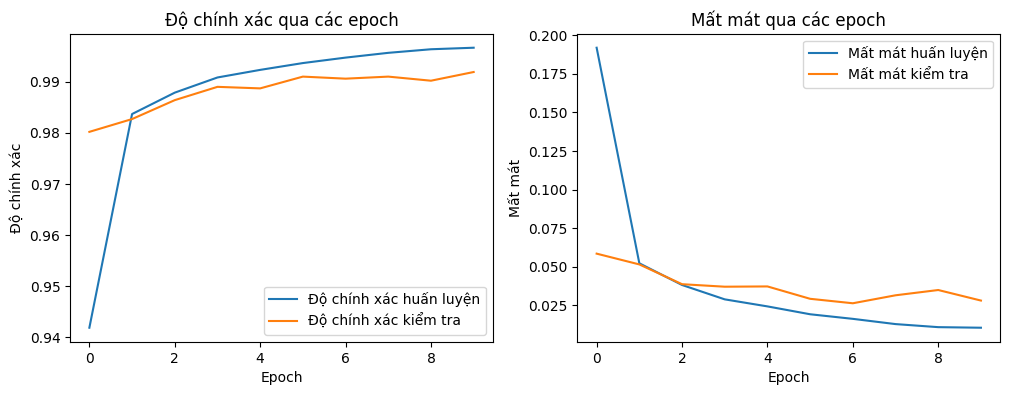

In [69]:
# Vẽ biểu đồ độ chính xác và mất mát
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Độ chính xác huấn luyện')
plt.plot(history.history['val_accuracy'], label='Độ chính xác kiểm tra')
plt.title('Độ chính xác qua các epoch')
plt.xlabel('Epoch')
plt.ylabel('Độ chính xác')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Mất mát huấn luyện')
plt.plot(history.history['val_loss'], label='Mất mát kiểm tra')
plt.title('Mất mát qua các epoch')
plt.xlabel('Epoch')
plt.ylabel('Mất mát')
plt.legend()

plt.show()

In [70]:
# 5. Lưu mô hình
model.save('mnist_cnn_model.h5')
print('Mô hình đã được lưu thành công với tên mnist_cnn_model.h5')

# 6. Tải mô hình về máy cá nhân
files.download('mnist_cnn_model.h5')

Mô hình đã được lưu thành công với tên mnist_cnn_model.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>